In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import seaborn as sns

C:\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
tree = et.parse("../data/AviationData.xml")

In [3]:
root = tree.getroot()
#check the number of child element
len(root[0])

77257

In [4]:
#test
root[0][1000].attrib

{'AccidentNumber': 'ERA15CA086',
 'AirCarrier': '',
 'AircraftCategory': 'Airplane',
 'AircraftDamage': 'Substantial',
 'AirportCode': '2A5',
 'AirportName': 'CAUSEY',
 'AmateurBuilt': 'No',
 'BroadPhaseOfFlight': 'LANDING',
 'Country': 'United States',
 'EngineType': 'Reciprocating',
 'EventDate': '12/27/2014',
 'EventId': '20141230X10247',
 'FARDescription': 'Part 91: General Aviation',
 'InjurySeverity': 'Non-Fatal',
 'InvestigationType': 'Accident',
 'Latitude': '35.911667',
 'Location': 'Liberty, NC',
 'Longitude': '-79.617778',
 'Make': 'CESSNA',
 'Model': '310N',
 'NumberOfEngines': '2',
 'PublicationDate': '06/09/2015',
 'PurposeOfFlight': 'Personal',
 'RegistrationNumber': 'N177JD',
 'ReportStatus': 'Probable Cause',
 'Schedule': '',
 'TotalFatalInjuries': '',
 'TotalMinorInjuries': '',
 'TotalSeriousInjuries': '',
 'TotalUninjured': '2',
 'WeatherCondition': 'VMC'}

In [5]:
#create a dataframe
events_list = [i.attrib for i in root[0]]
df_events = pd.DataFrame(events_list)
df_events.head()

,AccidentNumber,AirCarrier,AircraftCategory,AircraftDamage,AirportCode,AirportName,AmateurBuilt,BroadPhaseOfFlight,Country,EngineType,...,PublicationDate,PurposeOfFlight,RegistrationNumber,ReportStatus,Schedule,TotalFatalInjuries,TotalMinorInjuries,TotalSeriousInjuries,TotalUninjured,WeatherCondition
0,GAA15CA244,,,,,,,,United States,,...,,,N786AB,Preliminary,,,,,,
1,CEN15LA392,,Airplane,Substantial,IWS,WEST HOUSTON,No,LANDING,United States,,...,09/04/2015,Instructional,N452CS,Preliminary,,,,,2,VMC
2,GAA15CA246,,,,,,,,United States,,...,,,N112RP,Preliminary,,,,,,
3,GAA15CA243,,,,,,,,United States,,...,,,N8404X,Preliminary,,,,,,
4,GAA15CA242,,,,,,,,United States,,...,,,N5255G,Preliminary,,,,,,


## Clean-up

The dataframe has one major problem: empty cells from XML are stored as '' instead of null. 

In [6]:
df_events['EventDate'] = pd.to_datetime(df_events['EventDate'])
df_events['PublicationDate'] = pd.to_datetime(df_events['PublicationDate'])

In [8]:
df_events['AircraftDamage'].unique()

array(['', 'Substantial', 'Minor', 'Destroyed'], dtype=object)

In [67]:
#replace empty string with nan and calculate missing value
df_e = df_events.replace(r'^\s*$',np.nan, regex=True)
(len(df_e.index)-df_e.count())/len(df_e.index)*100

AccidentNumber           0.000000
AirCarrier              95.058053
AircraftCategory        78.616824
AircraftDamage           3.085805
AirportCode             43.724193
AirportName             38.735649
AmateurBuilt             0.846525
BroadPhaseOfFlight       8.060111
Country                  0.660134
EngineType               4.153669
EventDate                0.003883
EventId                  0.000000
FARDescription          78.429139
InjurySeverity           0.137204
InvestigationType        0.000000
Latitude                69.244211
Location                 0.104845
Longitude               69.255860
Make                     0.112611
Model                    0.148854
NumberOfEngines          5.075268
PublicationDate         17.070298
PurposeOfFlight          4.657183
RegistrationNumber       3.567314
ReportStatus             0.000000
Schedule                85.271238
TotalFatalInjuries      27.785185
TotalMinorInjuries      29.154640
TotalSeriousInjuries    30.434783
TotalUninjured

In [109]:
df_e['Country'].value_counts()

United States         73076
Canada                  225
Mexico                  197
Brazil                  191
Bahamas                 188
United Kingdom          188
Australia               178
France                  153
Germany                 143
Colombia                113
Spain                    91
Venezuela                85
Italy                    82
Japan                    75
Argentina                74
Ecuador                  68
Indonesia                67
Peru                     59
Switzerland              53
Dominican Republic       52
Russia                   46
Guatemala                44
China                    43
New Zealand              42
Ireland                  40
Austria                  40
Sweden                   37
Netherlands              36
Chile                    34
Panama                   33
                      ...  
Niger                     1
Montserrat                1
Eritrea                   1
Cyprus                    1
Burma               

In [113]:
#list top 10 fatal crashes in USA 
df_e[(df_e.Country == 'Malaysia')][['EventDate','Make','Model','TotalFatalInjuries']].sort_values(by='TotalFatalInjuries',ascending=False).head(10)

,EventDate,Make,Model,TotalFatalInjuries
2323,2014-03-08,BOEING,777 - 206,239.0
54856,1989-02-19,BOEING,747-200,4.0
4896,2012-07-20,EUROCOPTER,EC120B,3.0
18090,2005-07-25,Bell,206 L4,3.0
7345,2011-04-11,BELL,206B-III,1.0
8789,2010-06-25,ERICKSON,S64E,1.0
25104,2002-02-19,Bell,206 L3,1.0
51084,1990-07-27,MCDONNELL DOUGLAS,DC-10-30,0.0
7131,2011-05-25,DASSAULT,7X,NaN
9372,2010-03-09,EAGLE,150B,NaN


In [93]:
df_e['ReportStatus'].value_counts()

Probable Cause    72264
Foreign            3600
Preliminary        1144
Factual             249
Name: ReportStatus, dtype: int64

In [91]:
df_e['WeatherCondition'].value_counts()

VMC    68764
IMC     5580
UNK      924
Name: WeatherCondition, dtype: int64

In [85]:
df_e[['TotalFatalInjuries']].groupby(df_e['EventDate'].map(lambda x: x.year)).sum()

,TotalFatalInjuries
EventDate,
1948.0,2.0
1962.0,4.0
1974.0,3.0
1977.0,2.0
1979.0,1.0
1981.0,4.0
1982.0,1585.0
1983.0,1273.0
1984.0,1229.0


In [76]:
df_e['Make'].value_counts()
#Seems like manufacturer can be represented in uppercase and lowercase - should merge this! To do: fuzzy matching to account for typos

CESSNA                           16609
PIPER                             9179
Cessna                            7739
Piper                             4096
BEECH                             3030
Beech                             1748
BELL                              1515
BOEING                            1286
GRUMMAN                            903
Bell                               887
Boeing                             777
MOONEY                             743
BELLANCA                           681
HUGHES                             564
Robinson                           526
ROBINSON                           453
Mooney                             444
SCHWEIZER                          429
AERONCA                            390
Air Tractor                        364
McDonnell Douglas                  337
MAULE                              314
de Havilland                       312
Hughes                             300
CHAMPION                           297
Schweizer                

In [75]:
df_e['NumberOfEngines'].value_counts()
#18 and 24 engines? really?

1     61465
2      9854
0      1132
3       477
4       406
24        1
18        1
Name: NumberOfEngines, dtype: int64

From the missing value table above, it is clear that not every variables are usable for meaningful analysis.
The subsequent dataset will be a subset of the original dataset based on 'Make' variable as it has very few missing values.

Assumption: No value in injuries variables doesn't always mean that it is zero as it can also means that it is unknown.

In [68]:
#code to transform no value = 0
#df_e[['TotalFatalInjuries','TotalMinorInjuries','TotalSeriousInjuries','TotalUninjured']] = df_e[['TotalFatalInjuries','TotalMinorInjuries','TotalSeriousInjuries','TotalUninjured']].fillna(0)
df_e[['TotalFatalInjuries','TotalMinorInjuries','TotalSeriousInjuries','TotalUninjured']] = df_e[['TotalFatalInjuries','TotalMinorInjuries','TotalSeriousInjuries','TotalUninjured']].apply(pd.to_numeric)

In [69]:
df_e['TotalPerson'] = df_e['TotalFatalInjuries'] + df_e['TotalSeriousInjuries'] + df_e['TotalMinorInjuries'] + df_e['TotalUninjured'] 

In [70]:
df_e.head()

,AccidentNumber,AirCarrier,AircraftCategory,AircraftDamage,AirportCode,AirportName,AmateurBuilt,BroadPhaseOfFlight,Country,EngineType,...,PurposeOfFlight,RegistrationNumber,ReportStatus,Schedule,TotalFatalInjuries,TotalMinorInjuries,TotalSeriousInjuries,TotalUninjured,WeatherCondition,TotalPerson
0,GAA15CA244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,...,NaN,N786AB,Preliminary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CEN15LA392,NaN,Airplane,Substantial,IWS,WEST HOUSTON,No,LANDING,United States,NaN,...,Instructional,N452CS,Preliminary,NaN,NaN,NaN,NaN,2.0,VMC,NaN
2,GAA15CA246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,...,NaN,N112RP,Preliminary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GAA15CA243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,...,NaN,N8404X,Preliminary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GAA15CA242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,...,NaN,N5255G,Preliminary,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_e['PctInjured'] = (df_e['TotalSeriousInjuries'] + df_e['TotalMinorInjuries']) / df_e['TotalPerson'] * 100
df_e['PctDeath'] = df_e['TotalFatalInjuries'] / df_e['TotalPerson'] * 100

In [20]:
print "Number of accidents in the dataset: " + str(len(df_e.index))
print "Date range: " + str(df_e['EventDate'].min()) + " to " + str(df_e['EventDate'].max())
df_e[['TotalFatalInjuries','TotalMinorInjuries','TotalSeriousInjuries','TotalUninjured']].describe()

Number of accidents in the dataset: 77257
Date range: 1948-10-24 00:00:00 to 2015-09-01 00:00:00


,TotalFatalInjuries,TotalMinorInjuries,TotalSeriousInjuries,TotalUninjured
count,55791.000000,54733.000000,53744.000000,65862.000000
mean,0.788962,0.492555,0.309895,5.716817
std,6.087442,2.779814,1.368488,29.052413
min,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,349.000000,380.000000,111.000000,699.000000


In [54]:
#df_e1 = df_e[['PctInjured','PctDeath','TotalPerson']]
df_e1 = df_e[(df_e.TotalPerson <25)]
df_e2 = df_e[(df_e.TotalPerson >=25)]

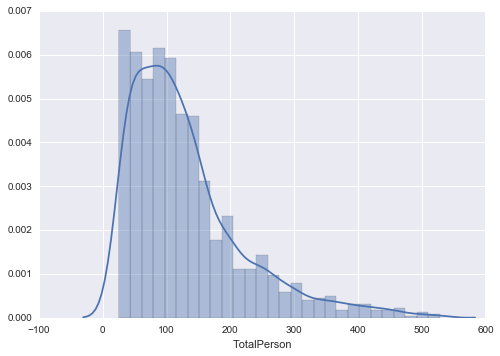

In [56]:
sns.distplot(df_e2['TotalPerson'].dropna())

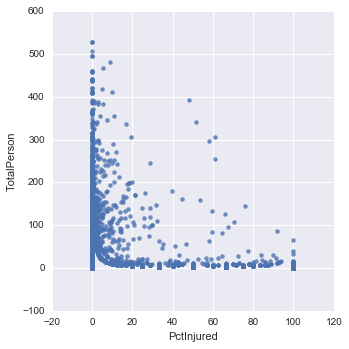

In [30]:
sns.lmplot("PctInjured", "TotalPerson", data=df_e1, fit_reg=False)

### Initial Impression
1. The dataset covers 6 decades of accidents, from 1948 to 2015
2. Overall, a very large number of accidents don't result in fatalities or injuries
3. However, once it does, it's ugly.

## Initial Exploration

Question: what is the most dangerous phase of flight, represented by number of fatalities?

In [65]:
#check phase and fatalinjuries
df_phase_e1 = df_e1[['BroadPhaseOfFlight','TotalFatalInjuries']].groupby('BroadPhaseOfFlight',as_index=False).count()
df_phase_e2 = df_e2[['BroadPhaseOfFlight','TotalFatalInjuries']].groupby('BroadPhaseOfFlight',as_index=False).count()
df_phase_e1


,BroadPhaseOfFlight,TotalFatalInjuries
0,APPROACH,5093
1,CLIMB,1536
2,CRUISE,8052
3,DESCENT,1393
4,GO-AROUND,1062
5,LANDING,11751
6,MANEUVERING,6516
7,OTHER,94
8,STANDING,619
9,TAKEOFF,9881


In [66]:
df_phase_e2

,BroadPhaseOfFlight,TotalFatalInjuries
0,APPROACH,112
1,CLIMB,111
2,CRUISE,215
3,DESCENT,120
4,GO-AROUND,11
5,LANDING,157
6,MANEUVERING,10
7,OTHER,4
8,STANDING,79
9,TAKEOFF,191


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

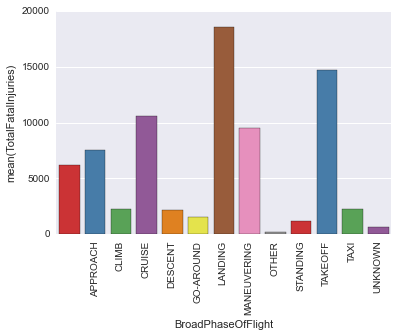

In [99]:
x = df_flight_phase['BroadPhaseOfFlight']
y = df_flight_phase['TotalFatalInjuries']
#lt.figure(figsize=(50,50))
sns.barplot(x,y,palette="Set1")
plt.xticks(rotation=90) 

In [100]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': (1, 1, 1, 0),
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}